# Hierarchical Agglomerative Clustering Linkage

Generate SciPy-style linkage matrices for downstream dendrogram visualization.

## Setup

We import NumPy and Clustor, configure NumPy printing for readability, and create a small dataset with two obvious clusters.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "python").exists():
    for parent in root.parents:
        if (parent / "python").exists():
            root = parent
            break

sys.path.insert(0, str(root / "python"))

import clustor  # noqa: E402

np.set_printoptions(precision=6, suppress=True)

X = np.array(
    [
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [10.0, 10.0],
        [10.0, 11.0],
        [11.0, 10.0],
    ],
    dtype=np.float64,
)

X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [10., 10.],
       [10., 11.],
       [11., 10.]])

## HAC linkage

Compute the linkage matrix for hierarchical agglomerative clustering.

In [2]:
Z = clustor.hac_dendrogram(X, method="average", metric="euclidean")
Z

array([[ 0.      ,  1.      ,  1.      ,  2.      ],
       [ 3.      ,  4.      ,  1.      ,  2.      ],
       [ 6.      ,  2.      ,  1.207107,  3.      ],
       [ 7.      ,  5.      ,  1.207107,  3.      ],
       [ 8.      ,  9.      , 14.165681,  6.      ]])

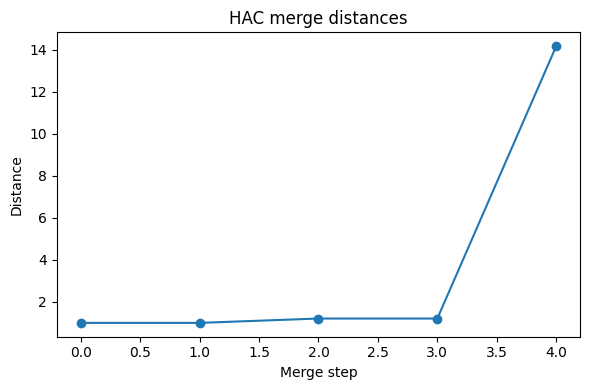

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Z[:, 2], marker="o")
ax.set_title("HAC merge distances")
ax.set_xlabel("Merge step")
ax.set_ylabel("Distance")
plt.tight_layout()